#Project One


##Part One - Logistic Regression


In [ ]:
#pip install --upgrade scikit-learn


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, recall_score, precision_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay



%matplotlib inline


In [ ]:
stroke = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")


###1 Code Pt 1


In [ ]:
#Code for 1
stroke.isnull().sum()

age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64

In [ ]:
# drop null values
stroke = stroke.dropna()
stroke.isnull().sum()

age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
stroke                     0
smoking_status_smokes      0
smoking_status_formerly    0
reg_to_vote                0
dog_owner                  0
raccoons_to_fight          0
fast_food_budget_month     0
income_in_k                0
er_visits                  0
dtype: int64

In [ ]:
stroke.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


##2 Code Pt 1

In [ ]:

#KF
kf = KFold(n_splits = 10, random_state = 123, shuffle = True)

In [ ]:
#predictors and continuous variables
predictors = ["age", "hypertension", "heart_disease", "ever_married",
              "Residence_type", "avg_glucose_level", "bmi", "smoking_status_smokes",
              "smoking_status_formerly", "reg_to_vote", "dog_owner", "raccoons_to_fight",
              "fast_food_budget_month", "income_in_k","er_visits"]
cont = ["age", "avg_glucose_level", "bmi", "raccoons_to_fight", "fast_food_budget_month", "income_in_k",
              "er_visits"]

In [ ]:
X = stroke[predictors]
y = stroke["stroke"]

#to store acc and roc data for train and test data
acc_train = []
acc_test = []

roc_train = []
roc_test = []

z = StandardScaler()
lr = LogisticRegression()

#train test split
for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]




In [ ]:
#z score and fit (only train data)
X_train[cont] = z.fit_transform(X_train[cont])
X_test[cont] = z.transform(X_test[cont])

In [ ]:
#fitting the model
lr.fit(X_train,y_train)

#accuracy and roc scores
acc_train.append(accuracy_score(y_train, lr.predict(X_train)))
acc_test.append(accuracy_score(y_test, lr.predict(X_test)))
roc_train.append(roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]))
roc_test.append(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

print(acc_train)
print(acc_test)
print(roc_train)
print(roc_test)


[0.960078125]
[0.9627285513361463]
[0.8780026626770039]
[0.8817237507018529]


### Explanation for code 2
I dont think that the model is overfit because the the training results are very similar to the testing results for accuracy and roc scores. This implies that the model is doing about as well predicting data that it has seen (training) vs hasn't (testing). It if were overfit, we would see high accuracy and roc scores for the training data and much lower scores for the testing data. This is because the model would be fitting too closely to each individual point and it wouldn't be very useful in capturing the overall trend ot predict future values.

## Code 3 Pt 1


In [ ]:

#new logistic regression
LR = LogisticRegression()
X_all = X[predictors]
y_all = stroke['stroke']

#fitting X
X_all[cont] = z.fit_transform(X_all[cont])

LR.fit(X_all,y_all)

#putting in dataframe
coef = pd.DataFrame({"Coefs": LR.coef_[0],
                    "Predictors": predictors})

coef

,Coefs,Predictors
0,1.613121,age
1,0.249543,hypertension
2,0.423396,heart_disease
3,-0.187965,ever_married
4,-0.019790,Residence_type
5,0.242798,avg_glucose_level
6,0.111694,bmi
7,0.294617,smoking_status_smokes
8,0.145672,smoking_status_formerly
9,-0.059925,reg_to_vote


## Code 4 Pt 1


0.960343130361412
0.03993055555555555
0.9991939029752308


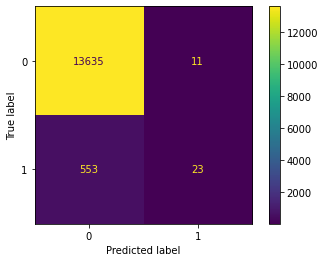

In [ ]:

#confusion matrix
ConfusionMatrixDisplay.from_predictions(y_all, lr.predict(X_all))

#Accuracy
acc = (13635 +23) /(13635 + 23 + 11 +553)
print(acc)
#Sensitivity
sen = 23/(23+553)
print(sen)
#Specificity
spe = 13635/(13635+11)
print(spe)

### Explanation for code 4

Overall our model is doing pretty well with an accuracy of about 96%. We can tell because the model correctly predicted that 13635 people did not have a stroke which can be seen in the upper left square. However, it also said that 553 people didn't have a stroke when they actually did which isn't great (bottom left). While this is a relativley small portion compared to the ones it accuratley predicted, having a heart attack it a big deal so our model should probably be a better in a high stakes situation like this. The confusion matrix also shows that our model accuratley predicted that 23 people had a stroke (bottom right), but it incorrectly predicted that 11 people had a stroke when they actually didn't (top right). We can see that our model does a much better job at classifying negatives because we have a specificity of 99.9%, while out model does a pretty poor job at classifying the positives, with a sensitivity of about 4%.

#Part Two - Exploration


### Code for 1 Pt 2


In [ ]:

#group 1
over_50_dog = (stroke['age'] > 50) & (stroke['dog_owner'] == 1)
over_50_dog = stroke.loc[over_50_dog]
stroke_50_dog = over_50_dog['stroke'] == 1
prob_stroke_1 = (stroke_50_dog.sum())/(len(over_50_dog))

#group 2
no_dog_smoke = (stroke['smoking_status_smokes'] == 1) & (stroke['dog_owner'] == 0)
no_dog_smoke = stroke.loc[no_dog_smoke]
stroke_ND_smoke = no_dog_smoke['stroke'] == 1
prob_stroke_2 = (stroke_ND_smoke.sum())/(len(no_dog_smoke))

#probabilities
print(prob_stroke_1)
print(prob_stroke_2)

0.08617290903970712
0.0387409200968523


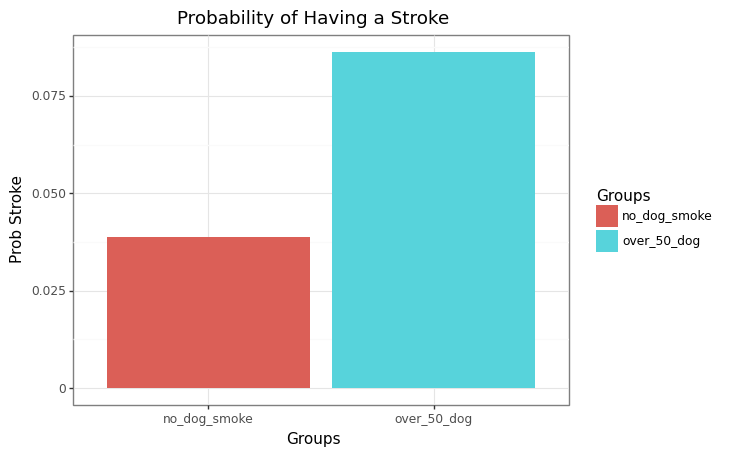

<ggplot: (8780243551735)>

In [ ]:
#creating the data frame
names = ["over_50_dog", "no_dog_smoke"]
group_prob = [prob_stroke_1, prob_stroke_2]
prob_group_stroke = pd.DataFrame({'Groups' : names, 'Prob Stroke': group_prob})

#plotting the results
(ggplot(prob_group_stroke, aes(x = 'Groups', y = 'Prob Stroke', fill = 'Groups')) + geom_bar(stat = 'identity') + theme(legend_position = 'none') + theme_bw() + labs(title = 'Probability of Having a Stroke'))

### Explanation for 1
Being in the group of people over 50 and having a dog has a higher probability of having a stroke than someone being in the group of people who doesn't have a dog and currently smokes. You can tell because the portion of people who are in the first group have comparitively more strokes than the other group. As seen in the graph, the bar for over_50_dog is much higher than no_dog_smoke which is being measured against the calculated probability of the two groups having a stroke. To calculate the probability of having a stroke, I broke up the original data. I only took the data of people without a dog that smokes and people over 50 with a dog. I then broke down these two groups even further and grabbed the number of people who had a stroke. I put the number of people who had a stroke over the total of each group to find the probability.

### Code for 2 Pt 2


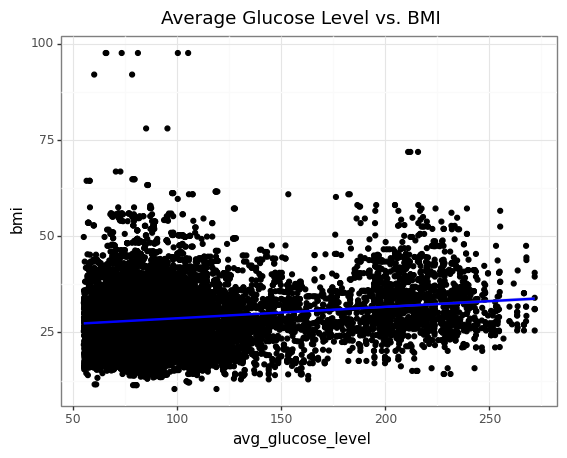

<ggplot: (8780243489139)>

In [ ]:
(ggplot(stroke, aes(x = "avg_glucose_level", y = "bmi"))+ geom_point() + theme_bw() + geom_smooth(method = 'lm', color = 'blue') + labs(title = 'Average Glucose Level vs. BMI'))

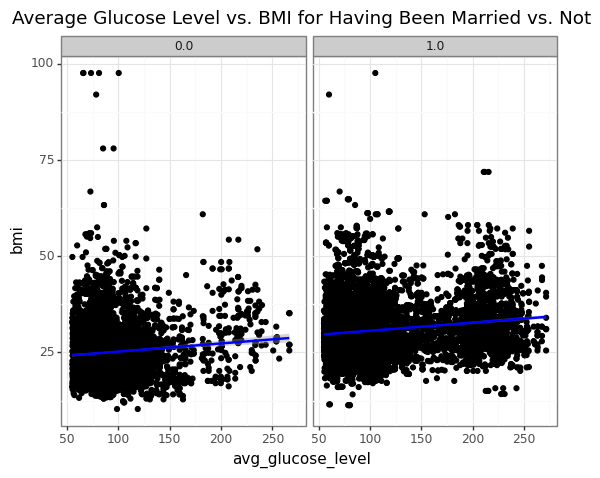

<ggplot: (8780243392943)>

In [ ]:
#plotting for being marries vs not being married
(ggplot(stroke, aes(x = "avg_glucose_level", y = "bmi"))+ geom_point()+ theme_bw()+ geom_smooth(method = 'lm', color = 'blue') + facet_wrap("~ever_married") + labs(title = 'Average Glucose Level vs. BMI for Having Been Married vs. Not'))

###Explanation for 2
There is a slight positive correlation between average glucose level and bmi which can be seen through the upward sloping linear trend line in the first  scatter plot above. However, bmi stays in a pretty consistent range no matter the average glucose level so the correlation isn't super strong between the two, but there is some.

The trend really seem doesn't change whether someone has been married or not. They appear to have the same estimated slope no matter what their marriage status is. Again, you can tell because of the linear trend line on the second graphs which have very similar slopes and y intercepts. The individual data points are also distributed in a very similar pattern with not too many outliers, however, it seems there is more data for people who have been married and more of them have higher glucose levels. The overall trend remains the same, though.  

### Code for 3 Pt 2


In [ ]:

predictStroke = LR.predict(X_all)
stroke['stroke_pred'] = predictStroke #add a new column so that predicted vals is in new dataframe for every point

#income under 30
income_to_30 = stroke["income_in_k"] < 30
income_to_30 = stroke.loc[income_to_30]
acc_income_30 = accuracy_score(income_to_30["stroke"], income_to_30["stroke_pred"])
print(acc_income_30)

#income between 30 and 90
income_30_90 = (stroke["income_in_k"] > 30) & (stroke["income_in_k"] < 90)
income_30_90 = stroke.loc[income_30_90]
acc_30_90 = accuracy_score(income_30_90["stroke"], income_30_90["stroke_pred"])
print(acc_30_90)

#income above 90
income_over_90 = (stroke["income_in_k"] > 90)
income_over_90 = stroke.loc[income_over_90]
acc_over_90 = accuracy_score(income_over_90["stroke"], income_over_90["stroke_pred"])
print(acc_over_90)



1.0
0.9610494995942657
0.9547339322736696


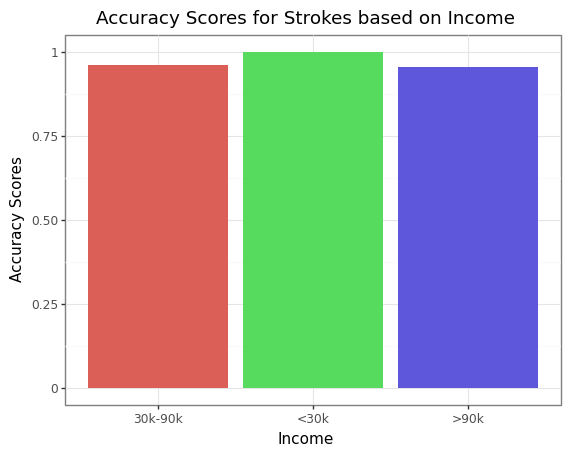

<ggplot: (8780243158821)>

In [ ]:
acc_df = pd.DataFrame({"Accuracy Scores" : [acc_income_30, acc_30_90, acc_over_90], "Income": ['<30k', "30k-90k", ">90k"]})


(ggplot(acc_df, aes(x = 'Income', y = 'Accuracy Scores', fill = "Income")) + geom_bar(stat = 'identity') + theme_bw() + theme(legend_position = 'none') + labs(title = "Accuracy Scores for Strokes based on Income"))

### Explanation for 3

The logistic model is most accurate for people who make less than 30k. You can tell because the accuracy score is 1, meaning that the model is 100% accurate. The second most accurate is between 30k - 90k with an accuracy score of 0.96 or 96%. Last, still with a really strong accuaracy score, is for those above 90k with a 0.95 accuracy score.

If there was a huge disparity between the income groups, this could be ethically problematic because there would be data bias between the groups and our model would be less reliable in predicting whether or not someone would have a stroke, which is very important to have high accuracy for, no matter the socioeconomic background.

### Code for 4 Pt 2


In [ ]:

#creating a dataframe with only selected predictors and their coefficients
coef_strong = coef[(coef["Predictors"] == 'ever_married') | (coef["Predictors"] == "Residence_type") | (coef["Predictors"] == 'dog_owner') | (coef['Predictors'] == 'reg_to_vote')]
coef_strong

,Coefs,Predictors
3,-0.187965,ever_married
4,-0.019790,Residence_type
9,-0.059925,reg_to_vote
10,0.015419,dog_owner


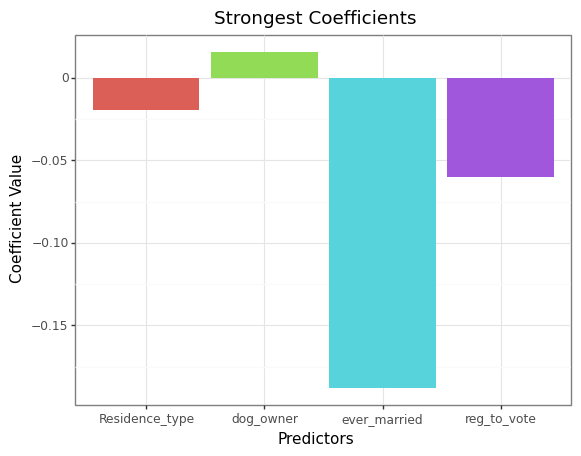

<ggplot: (8780243066769)>

In [ ]:
(ggplot(coef_strong, aes(x = 'Predictors', y = 'Coefs', fill = 'Predictors')) + geom_bar(stat = 'identity') + theme_bw() + theme(legend_position = 'none') +
 labs(title = "Strongest Coefficients", y = "Coefficient Value"))

### Explanation for 4

The variable that is the strongest predictor is ever_married because its coefficient has the largest magnitude. It is negative which means that having been married compared to not being married is correlated with a .18 decrease in the log odds of having a stroke. Out of all the predictors, this one has the largest singluar impact because all of the other coefficiants are smaller.

### Code for 5 Pt 2

0.14571285474391976
0.7700354208476468


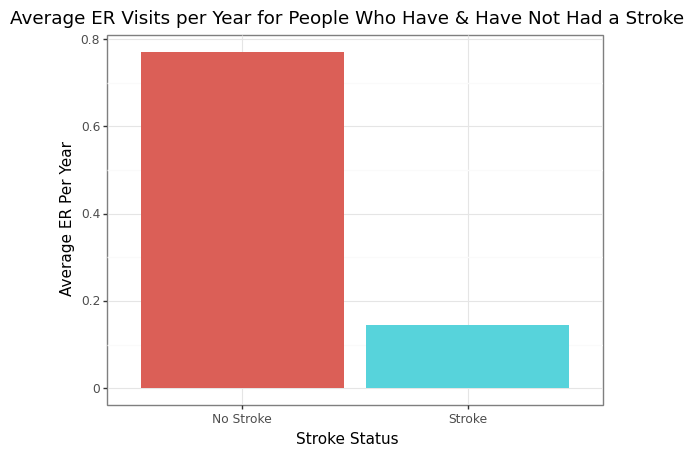

<ggplot: (8780245657631)>

In [ ]:

#calculating average stroke per year
stroke["er_visits_per_year"] = stroke['er_visits'] / stroke['age']

#calc the mean er visits for people who've had a stroke
had_stroke = stroke[stroke['stroke'] == 1]
had_stroke_mean = (had_stroke['er_visits_per_year']).sum() /(len(had_stroke))

#calc the mean er visits for people who've hadn't a stroke
not_had_stroke = stroke[stroke['stroke'] == 0]
not_had_stroke_mean = (not_had_stroke['er_visits_per_year']).sum() / (len(not_had_stroke))

print(had_stroke_mean)
print(not_had_stroke_mean)


#create dataframe that have avg num of er visits for stroke and non stroke
stroke_status = ["No Stroke", "Stroke"]
ER_avg = [not_had_stroke_mean, had_stroke_mean]
avg_er = pd.DataFrame({'Stroke Status' : stroke_status, 'Average ER Per Year': ER_avg})
avg_er

(ggplot(avg_er, aes(x = 'Stroke Status', y = 'Average ER Per Year', fill = 'Stroke Status')) + geom_bar(stat = 'identity') + theme_bw() +
 labs(title = "Average ER Visits per Year for People Who Have & Have Not Had a Stroke"))  + theme(legend_position = 'none')



### Explanation for 5

The bar graph shows that the group of people who havent had a stroke go to the ER more on average every year compared the the people that haven't had a stroke. You can tell because I calculated the average er visits for the two groups, added the results to a data frame, and then ploted it on a bar chart. The bar chart shows that the people who didn't have a stroke have a higher average number of ER visits per year than people that did have a stroke (0.77 vs 0.14).

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/ProjectOne(T1).ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "ProjectOne(T1).ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
texlive is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes